# WanderLust

## Import Library

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_DIRECTORY = '/content/drive/MyDrive/Bangkit Stuff/Dataset'

# Read the dataset from csv
df_master = pd.read_csv(f'{BASE_DIRECTORY}/final_tour_locations.csv')
df_master.head()

,place_id,place_name,location,description,category,city,rating,lat,long,kelurahan,kecamatan,open_hour
0,1,Kota Tua,"Jalan Kali Besar Barat, RT.11/RW.2, Pinangsia,...",Kompleks budaya yang bersejarah dan terkenal s...,Pusat Perbelanjaan,Jakarta,9.0,-6.137645,106.817124,Pinangsia,Tamansari,09:00 - 21:00
1,2,Ragunan,"Jl. Harsono No.1, Ragunan, Ps. Minggu, Jakarta...",Taman Margasatwa Ragunan: Taman margasatwa ter...,Cagar Alam,Jakarta,8.6,-6.311600,106.820500,Ragunan,Pasar Minggu,07:30 - 16:00
2,3,Monas,"Jl. Medan Merdeka, Gambir, Jakarta Pusat",Monas adalah monumen nasional yang terletak di...,Cagar Alam,Jakarta,9.2,-6.175392,106.827153,Gambir,Gambir,08:00 - 15:00
3,4,Masjid Istiqlal,"Jalan Taman Wijaya Kusuma No. 1, Jakarta Pusat...",Masjid Istiqlal adalah masjid terbesar di Indo...,Tempat Ibadah,Jakarta,9.4,-6.169289,106.830536,Pasar Baru,Sawah Besar,24 Hours
4,5,Mall Thamrin City,"Jl. Thamrin Boulevard, Kebon Melati, Tanah Aba...",Mall Thamrin City adalah pusat perbelanjaan di...,Pusat Perbelanjaan,Jakarta,8.4,-6.188456,106.823712,Kebon Melati,Tanah Abang,10:00 - 22:00


# Data Preprocessing

## Encoding Categorical Features

In [ ]:
label_encoder = LabelEncoder()
df_master['category'] = label_encoder.fit_transform(df_master['category'])
df_master['city'] = label_encoder.fit_transform(df_master['city'])

## Handle Missing Values

In [ ]:
df_master = df_master.fillna(0)
df_master.head()

,place_id,place_name,location,description,category,city,rating,lat,long,kelurahan,kecamatan,open_hour
0,1,Kota Tua,"Jalan Kali Besar Barat, RT.11/RW.2, Pinangsia,...",Kompleks budaya yang bersejarah dan terkenal s...,7,3,9.0,-6.137645,106.817124,Pinangsia,Tamansari,09:00 - 21:00
1,2,Ragunan,"Jl. Harsono No.1, Ragunan, Ps. Minggu, Jakarta...",Taman Margasatwa Ragunan: Taman margasatwa ter...,3,3,8.6,-6.311600,106.820500,Ragunan,Pasar Minggu,07:30 - 16:00
2,3,Monas,"Jl. Medan Merdeka, Gambir, Jakarta Pusat",Monas adalah monumen nasional yang terletak di...,3,3,9.2,-6.175392,106.827153,Gambir,Gambir,08:00 - 15:00
3,4,Masjid Istiqlal,"Jalan Taman Wijaya Kusuma No. 1, Jakarta Pusat...",Masjid Istiqlal adalah masjid terbesar di Indo...,10,3,9.4,-6.169289,106.830536,Pasar Baru,Sawah Besar,24 Hours
4,5,Mall Thamrin City,"Jl. Thamrin Boulevard, Kebon Melati, Tanah Aba...",Mall Thamrin City adalah pusat perbelanjaan di...,7,3,8.4,-6.188456,106.823712,Kebon Melati,Tanah Abang,10:00 - 22:00


In [ ]:
df_seq = pd.read_csv(f'{BASE_DIRECTORY}/final_sequential.csv')
df_seq.head()

,no,lokasi,objek_wisata_seq
0,1,Jakarta,"Kota Tua,Ragunan,Monas,Sea World Ancol"
1,2,Jakarta,"Monas,Masjid Istiqlal,Mall Thamrin City,Tanah ..."
2,3,Jakarta,"Monas,Museum Sejarah Jakarta,Kota Tua,Gedung B..."
3,4,Jakarta,"Monas,Kota Tua,Sea World Ancol,Mall Thamrin City"
4,5,Jakarta,"Pasar Baru,Masjid Jami Kebon Jeruk,Museum BI,G..."


In [ ]:
place_name_to_id = dict(zip(df_master['place_name'], df_master['place_id']))
id_to_place_name = {v: k for k, v in place_name_to_id.items()}
place_id_to_city = dict(zip(df_master['place_id'], df_master['city']))

print(place_id_to_city)

def replace_place_names_with_ids(sequence):
    places = sequence.split(',')
    place_ids = [str(place_name_to_id.get(place.strip(), place)) for place in places]
    return ','.join(place_ids)

df_seq['objek_wisata_seq'] = df_seq['objek_wisata_seq'].apply(replace_place_names_with_ids)

df_seq.head()


{1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 4, 109: 4, 110: 4, 111: 4, 112: 4, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 0, 139

,no,lokasi,objek_wisata_seq
0,1,Jakarta,"1,2,3,7"
1,2,Jakarta,"3,4,5,34,6,2,7,8"
2,3,Jakarta,"3,9,1,10,11,12,13"
3,4,Jakarta,"3,1,7,5"
4,5,Jakarta,"14,15,16,17,18,19,20,3,21"


In [ ]:
df_seq = df_seq.dropna(subset=['lokasi'])

In [ ]:
def create_windowed_dataset(data, window_size):
    windowed_data = []
    for row in data:
        if ',' not in row:
            continue
        places = [place.strip() for place in row.split(',') if place.strip()]
        if len(places) >= window_size + 1:
            for i in range(len(places) - window_size):
                windowed_data.append(places[i:i + window_size + 1])
    return windowed_data

In [ ]:
places_data = df_seq['objek_wisata_seq'].tolist()

window_size = 2

windowed_dataset = create_windowed_dataset(places_data, window_size)

sequences_df = pd.DataFrame(windowed_dataset, columns=[f'place_{i}' for i in range(window_size)] + ['target'])

X = sequences_df.drop(columns=['target']).astype('int64')
y = sequences_df['target'].astype('int64')

df_master['place_id'] = df_master['place_id'].astype('int64')

print(X)
print(y)

      place_0  place_1
0           1        2
1           2        3
2           3        4
3           4        5
4           5       34
...       ...      ...
1237       76      283
1238      283      260
1239      262      242
1240      107      263
1241      268      275

[1242 rows x 2 columns]
0         3
1         7
2         5
3        34
4         6
       ... 
1237    260
1238    270
1239    269
1240    274
1241    262
Name: target, Length: 1242, dtype: int64


In [ ]:
non_numeric_X = sequences_df.drop(columns=['target']).apply(lambda x: pd.to_numeric(x, errors='coerce').isna())
non_numeric_X = sequences_df.drop(columns=['target'])[non_numeric_X.any(axis=1)]

non_numeric_y = pd.to_numeric(sequences_df['target'], errors='coerce').isna()
non_numeric_y = sequences_df['target'][non_numeric_y]

print("Non-numeric values in X:")
print(non_numeric_X)
print("\nNon-numeric values in y:")
print(non_numeric_y)

Non-numeric values in X:
Empty DataFrame
Columns: [place_0, place_1]
Index: []

Non-numeric values in y:
Series([], Name: target, dtype: object)


## Generate Sequential Tourism Destination Dataset (untuk coba coba aja, nanti cari dataset sendiri)

In [ ]:
# sequences = []
# sequence_length = 5

# for i in range(len(df_master) - sequence_length):
#     seq = df_master['Place_Id'].iloc[i:i+sequence_length+1].tolist()
#     sequences.append(seq)

# sequences_df = pd.DataFrame(sequences, columns=[f'place_{i}' for i in range(sequence_length)] + ['target'])

# X = sequences_df.drop(columns=['target'])
# y = sequences_df['target']

# print(X)
# print(y)

## Make ML model using LSTM

In [ ]:
places_names = df_master['place_name'].unique()
places_names

array(['Kota Tua', 'Ragunan', 'Monas', 'Masjid Istiqlal',
       'Mall Thamrin City', 'Museum Fatahillah', 'Sea World Ancol',
       'Pantai Ancol Jakarta', 'Museum Sejarah Jakarta',
       'Gedung Bank Indonesia', 'Sudirman-Thamrin',
       'Taman Mini Indonesia Indah', 'Galeri Nasional Indonesia',
       'Pasar Baru', 'Masjid Jami Kebon Jeruk', 'Museum BI',
       'Gedung Arsip', 'Museum Nasional', 'Balai Kota', 'IRTI', 'Juanda',
       'Pecenongan', 'Menara Topas', 'Plaza Indonesia', 'Sarinah', 'GBK',
       'Istora', 'FX Sudirman', 'Bundaran Senayan', 'Wisma Nusantara',
       'PIK', 'Pelabuhan Sunda Kelapa', 'ITC Mangga Dua', 'Tanah Abang',
       'Ikon Kota Bogor Lawang Salapan', 'Tugu Kujang',
       'Kebun Raya Bogor', 'Museum Zeologi', 'Jungle Water Park',
       'Gunung Gede Pangrango dan Kunjungan ke Perkebunan Teh',
       'Paralayang Bukit Gantole Puncak', 'Taman Bunga Nusantara',
       'Highland Park Resort', 'Curug 7 Cilember', 'The Ranch Puncak',
       'Cimory Riversi

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=len(place_name_to_id)+1, output_dim=50, input_length=window_size),
    LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(len(place_name_to_id)+1, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=64, callbacks=[early_stopping, reduce_lr])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.0025 - loss: 6.5208 - val_accuracy: 0.1446 - val_loss: 6.2639 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0434 - loss: 6.0263 - val_accuracy: 0.1446 - val_loss: 6.0916 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0986 - loss: 5.6623 - val_accuracy: 0.1446 - val_loss: 5.9559 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1966 - loss: 5.3162 - val_accuracy: 0.1446 - val_loss: 5.8455 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2506 - loss: 4.9530 - val_accuracy: 0.1446 - val_loss: 5.7505 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2674 - loss: 4.6691 - val_accuracy: 0.1446 - val_loss: 5.6628 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2829 - loss: 4.3734 -

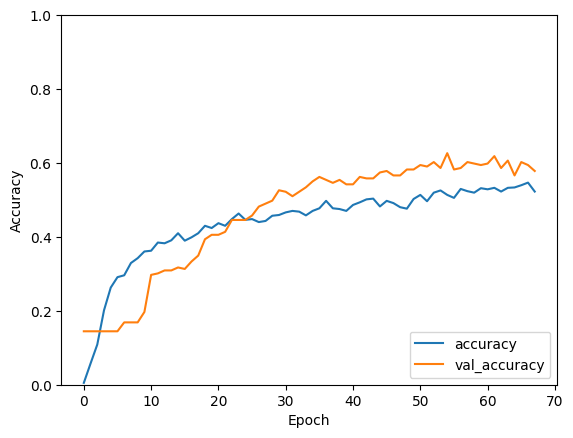

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Method for randomize first destination based on category and method for generate destination set

In [ ]:
import numpy as np

def predict_next_location(current_sequence):
    current_sequence_ids = [place_name_to_id[place] for place in current_sequence]
    current_city = place_id_to_city[current_sequence_ids[0]]
    current_sequence_ids = np.array(current_sequence_ids[-window_size:]).reshape(1, -1)
    predictions = model.predict(current_sequence_ids)[0]
    for current_id in current_sequence_ids[0]:
        predictions[current_id] = 0
    for place_id, city in place_id_to_city.items():
        if city != current_city:
            predictions[place_id] = 0
    predicted_id = np.argmax(predictions)
    predicted_place = id_to_place_name[predicted_id]
    return predicted_place

current_sequence = ['Kota Tua', 'Mall Thamrin City']
predicted_next_place = predict_next_location(current_sequence)
print(f"The predicted next place after {current_sequence} is {predicted_next_place}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
The predicted next place after ['Kota Tua', 'Mall Thamrin City'] is Monas


In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, './my_model.h5')

failed to lookup keras version from the file,
    this is likely a weight only file
